# Exploring the data

## Importing the libraries

In [125]:
import pandas as pd
from sklearn import linear_model
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats
from scipy.stats import chisquare

## Loading the data

In [126]:
df = pd.read_csv('train - Copy.csv')
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtFinType1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')

## Feature Engineering

### Split the numeric data and test correlation

In [127]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

In [128]:
df_num.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.140759,-0.238518,-0.251758,...,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.132644,0.392075,0.457181,...,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,-0.002618,0.260833,0.299475,...,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.308159,0.537808,0.476224,...,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.136841,-0.171098,-0.144203,...,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.149040,0.391452,0.281986,...,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.181133,0.291066,0.240379,...,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,0.021490,0.035743,0.507101
BsmtUnfSF,-0.140759,0.132644,-0.002618,0.308159,-0.136841,0.149040,0.181133,1.000000,0.415360,0.317987,...,0.250647,0.051575,0.190708,0.214175,0.183303,-0.005316,0.129005,0.034888,-0.041258,0.214479
TotalBsmtSF,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.415360,1.000000,0.819530,...,0.285573,0.339519,0.322445,0.434585,0.486665,0.232019,0.247264,0.013196,-0.014969,0.613581
1stFlrSF,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.317987,0.819530,1.000000,...,0.409516,0.410531,0.233449,0.439317,0.489782,0.235459,0.211671,0.031372,-0.013604,0.605852


### Drop highly correlated column

In [129]:
df_num=df_num.drop(['1stFlrSF'],axis=1)

### Split categorical data and test chi square

In [130]:
df_cat= df.select_dtypes(include = ['object'])

In [131]:
for col in df_cat:
 le = LabelEncoder()
 df_cat[col] = le.fit_transform(df_cat[col])
df_cat

,LotShape,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
0,3,5,5,12,13,1,2,2,2,2,0,2,5,1,1
1,3,24,2,8,8,3,3,1,2,0,0,3,4,1,1
2,0,5,5,12,13,1,2,2,2,2,0,2,4,1,1
3,0,6,5,13,15,3,3,0,3,0,2,2,2,5,2
4,0,15,5,12,13,1,2,2,2,2,0,2,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,8,5,12,13,3,3,2,2,5,0,3,4,1,1
1456,3,14,2,9,10,2,3,1,2,0,4,3,4,1,2
1457,3,6,5,5,5,3,0,4,3,2,0,2,2,1,1
1458,3,12,2,8,8,3,3,1,3,2,2,2,5,1,2


In [132]:
chisquare(df_cat)

Power_divergenceResult(statistic=array([1491.48942172, 4306.84469168, 1754.18935978, 1550.00967834,
       1768.85691574,  558.58034368,  276.68176915,  545.17851888,
        511.71836007, 1820.93917275, 2869.85040071,  429.74941452,
        750.46534653, 2193.70046845,  905.61866667]), pvalue=array([2.71142412e-001, 2.61588107e-278, 1.32772909e-007, 4.81305721e-002,
       3.60029639e-008, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 2.37945106e-010, 1.41383489e-094, 1.00000000e+000,
       1.00000000e+000, 1.36825965e-032, 1.00000000e+000]))

In [133]:
df_cat

,LotShape,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
0,3,5,5,12,13,1,2,2,2,2,0,2,5,1,1
1,3,24,2,8,8,3,3,1,2,0,0,3,4,1,1
2,0,5,5,12,13,1,2,2,2,2,0,2,4,1,1
3,0,6,5,13,15,3,3,0,3,0,2,2,2,5,2
4,0,15,5,12,13,1,2,2,2,2,0,2,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,8,5,12,13,3,3,2,2,5,0,3,4,1,1
1456,3,14,2,9,10,2,3,1,2,0,4,3,4,1,2
1457,3,6,5,5,5,3,0,4,3,2,0,2,2,1,1
1458,3,12,2,8,8,3,3,1,3,2,2,2,5,1,2


### Drop highly dependent features

In [134]:
df_cat=df_cat.drop(['LotShape','MasVnrType','ExterQual','Foundation','BsmtQual','KitchenQual','FireplaceQu','GarageFinish'] , axis=1 , inplace=True)

In [135]:
df_cat

### Merge the data

In [136]:
df2=pd.concat([df_cat,df_num],axis=1)

In [137]:
df2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,150,856,854,...,8,0,2003.0,2,548,0,61,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,284,1262,0,...,6,1,1976.0,2,460,298,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,434,920,866,...,6,1,2001.0,2,608,0,42,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,540,756,756,...,7,1,1998.0,3,642,0,35,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,490,1145,1053,...,9,1,2000.0,3,836,192,84,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,953,953,694,...,7,1,1999.0,2,460,0,40,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,589,1542,0,...,7,2,1978.0,2,500,349,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,877,1152,1152,...,9,2,1941.0,1,252,0,60,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0,1078,0,...,5,0,1950.0,1,240,366,0,4,2010,142125


## Data Cleaning

### Check null values

In [138]:
df2.isna().sum()

MSSubClass        0
LotFrontage     259
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
BsmtUnfSF         0
TotalBsmtSF       0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

### Check outliers in numerical feature

<Axes: >

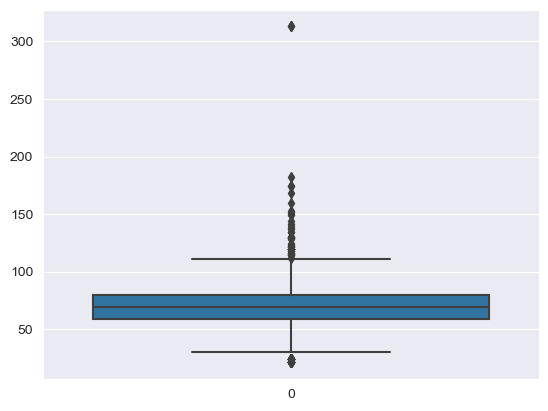

In [139]:
sns.boxplot(df2['LotFrontage'])

### Remove Ouliers

In [140]:
Q1 = df2['LotFrontage'].quantile(0.25)
Q3 = df2['LotFrontage'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df2[(df2['LotFrontage'] >= lower_bound) & (df2['LotFrontage'] <= upper_bound)]

### Replace null values with mean

In [141]:
df2['LotFrontage']=df2["LotFrontage"].fillna(df2['LotFrontage'].mean())

In [142]:
df2.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtUnfSF        0
TotalBsmtSF      0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt     81
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

### Drop the rest rows that contain null values

In [143]:
df2=df2.fillna(df2['GarageYrBlt'].mode()[0])

In [144]:
df2.isna().sum()

MSSubClass      0
LotFrontage     0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
BsmtUnfSF       0
TotalBsmtSF     0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
MoSold          0
YrSold          0
SalePrice       0
dtype: int64

## Regression

### Split the training and the taarget data

In [145]:
df2.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [146]:
X = df2.drop('SalePrice',axis =1)
y = df2['SalePrice']

### Creating Linear Regression object and fitting it

In [147]:
from sklearn.model_selection import train_test_split

reg = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
reg.fit(X_train,y_train)

LinearRegression()

In [149]:
pred = reg.predict(X_test)
pred

array([154192.72748145, 309537.51281285, 114409.43455484, 185910.29703962,
       302586.2536036 ,  56320.83939778, 230323.17840005, 151056.25552412,
        54403.73393624, 133261.54482521, 157172.97121883, 115940.35434734,
        78410.81226036, 211868.93930511, 192380.01548374, 138936.23730527,
       217211.83699093, 134626.64153911, 115624.027973  , 231474.82446575,
       187402.41750936, 216263.60625292, 191918.67399294, 122198.78399659,
       214272.70966497, 150528.2332932 , 200562.01052273,  77558.29696993,
       182055.78499654, 187926.07744063, 118299.90781293, 269877.38888693,
       235005.38996182,  88415.04389532, 268294.16624831, 162225.54964394,
       152185.49331043, 222120.70709227, 312606.23745605,  86779.30727833,
       144545.58476878, 255025.37408532, 110557.08834271, 277889.36703269,
       129103.42951116, 125400.23558367, 111102.92470732, 130418.85079647,
       356674.56177451, 125332.26368928, 109437.08142644, 221628.02162183,
        90618.04237927, 3

### Calculating model metrics

In [150]:
reg.score(X_test,y_test)

0.8129550996909459

In [151]:
np.sqrt(sklearn.metrics.mean_squared_error(y_test,pred))

37877.37320302506

### Visualizing R2 score

AttributeError: 'Series' object has no attribute 'reshape'

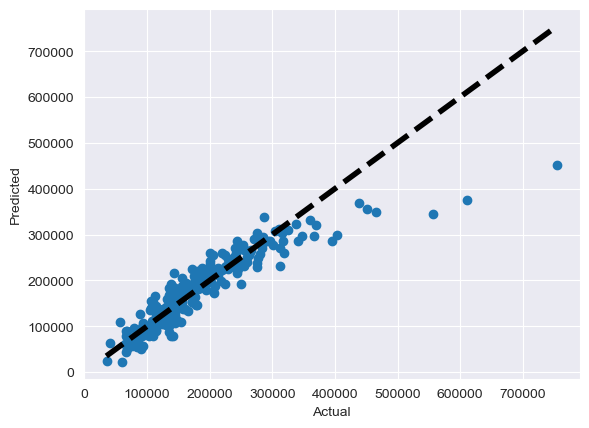

In [152]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
y_test, y_predicted = y_test.reshape(-1,1), pred.reshape(-1,1)
ax.plot(y_test, reg().fit(y_test, pred).predict(y_test))

plt.show()